<a href="https://colab.research.google.com/github/Shiva-eb/MLProjects/blob/master/TimeSeries_Vehicle_Miles_Travel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Dataset**

The dataset used in this project is from US Federal Highway Administration, showing the travel volume trend in milions of miles from 1970 to 2019.[1](https://fred.stlouisfed.org/series/TRFVOLUSM227NFWA)

**Forecasting Traffice Volume for the next 12 months**

Using the data provide in the aforementioned link, I will create a model to forecast the call traffic from December of 2020 to November of 2021. Steps:


1.   Exploring Data
2.   Model I: ARIMA
3.   Model II: SARIMA
4.   Model III: Deep Learning
5.   Model IV: FaceBook Prophet
6.   Comparing the performance of the models
7.   Retraining of the model and forecasting
8.   Conclusion

*This project is done as a part of my UDemy course: Python for Time Series Data Analysis.


**1. Exploring the Data**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import data
from google.colab import files
uploaded=files.upload()


Saving Milage.csv to Milage (2).csv


In [21]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Milage.csv']),index_col='DATE',parse_dates=True)



In [22]:
#Set the dataframe frequency
df.index.freq='MS'

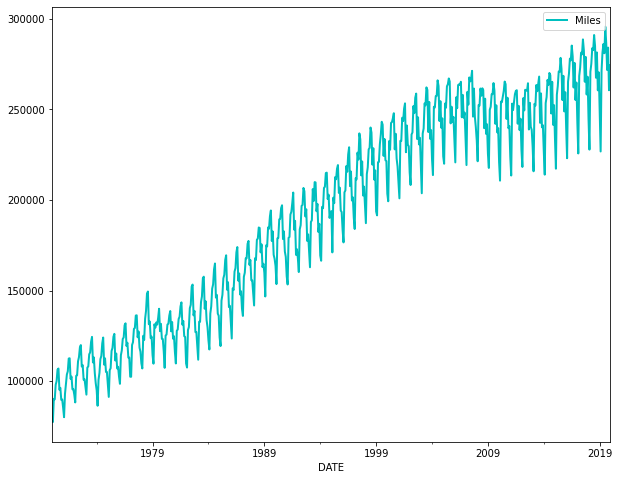

In [23]:
#Plot the Data
df.plot.line(figsize=(10,8),lw=2,color='c')

**Decomposing the Time Series**
In this section we further investigate the: Trend and Seasonality.

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_df=seasonal_decompose(df,model='additive')

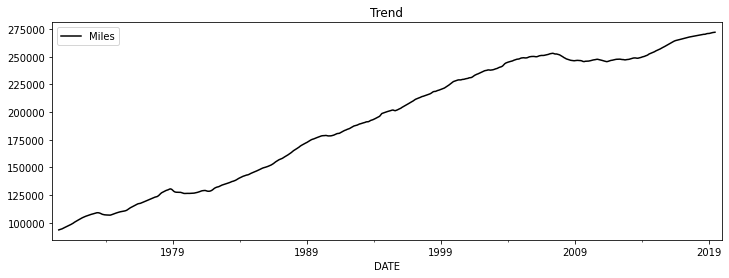

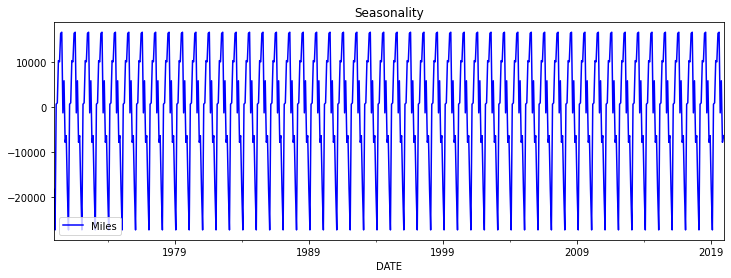

In [33]:
seasonal_df.trend.plot(figsize=(12,4),color='black',title='Trend');
seasonal_df.seasonal.plot(figsize=(12,4),color='b',title='Seasonality');
